# Final DSEI210 S2021 Programming Part 

Complete the notebook problems on the google colab or your home machine. Submit the your completed ipython notebook to blackboard. You may use any

## Problem 1: Clustering evaluation
We will be working with this file of wheat seed data: http://bit.ly/seed-data

The data is a text file. You will need to parse the file. The first 7 columns are attributes. The last column is a classifier for a wheat type. The goal here is not to do classification but you should separate this column. It will be useful for evaluation. The attributes are:

Seven geometric parameters of wheat kernels were measured:

1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
8. species 1, 2, 3 (Kama, Rosa, Canadian)

Parameters 1-7 are real-valued continuous.

(1) Separate the species into separate data variable y to be used for evaluation.

(2) Make an X with your 7 "input variables" and all the rows

(3) Set up PCA to 2d and project while coloring the dots by true class. Putting the data back in a data frame with the y or target variable, and using the visualization library seaborn makes this very easy. 

(4)  You will use 3 clustering methods. You will try K means, DBScan and Mean shift. To assign labels.

(5) Intrinsic evaluation. The metric sklearn.metrics.silhouette_score does not requre knowing the labels. Use this score to optimize one hyperparameter for each method.

(6) Using the same PCA as above show the clustering results by three colors for comparison in a three figure scatterplot (one for each clustering algorithm).

(7) So far, except for the coloring, you should not have been using the labels in any way. Now, see how well the clustering did by appling the metrics.adjusted_rand_score. 

(8) Make a bar graph of the performance of the three clustering algoritms both for the intrinsic and extrinsic metrics.

### Import Libraries

In [164]:
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import accuracy_score


### Read Data - Part 1 and 2

In [165]:
columns = ['area', 'perimeter', 'compactness', 
           'kernel length', 'kernel width', 'asymmetry coefficient',
          'kernel groove length','species']
target = ['Kama', 'Rosa', 'Canadian']

data = pd.read_csv('http://www-cs.ccny.cuny.edu/~grossberg/files/seeds_dataset.txt',sep='\t', header = None)
data.columns = columns
y = data[['species']]
X = data[['area', 'perimeter', 'compactness', 
           'kernel length', 'kernel width', 'asymmetry coefficient',
          'kernel groove length']]


### PCA for Changing data to 2d new data - Part 3

In [166]:
pca = PCA(n_components=2)
new_data = pca.fit_transform(X)
new_data1 = pd.DataFrame(new_data, columns=['F1', 'F2'])
new_data1 = pd.concat([new_data1, y], axis = 1)


#### Plot Data After PCA

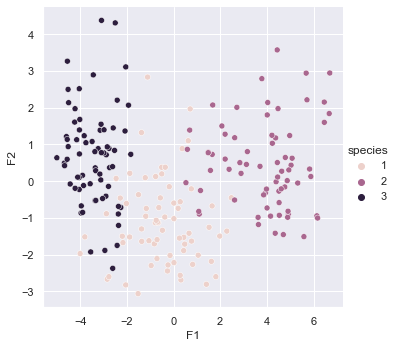

In [167]:
sns.relplot(x="F1", y="F2", hue="species", data=new_data1);

### Clustering methods and their optimization - Parts 4 and 5

### K-Means Method

In [168]:
max_iter = [1, 2, 3, 5, 10, 20, 30]
score_kmeans = []
for i in max_iter:
    kmeans = KMeans(n_clusters=3, max_iter = i).fit(new_data)
    cluster_labels_kemeans = kmeans.predict(new_data)
    silhouette_avg = silhouette_score(new_data, cluster_labels_kemeans)
    score_kmeans.append(silhouette_avg)

print(score_kmeans)


[0.4802142699427175, 0.47657715939873535, 0.4802142699427175, 0.4802142699427175, 0.4802142699427175, 0.4802142699427175, 0.4802142699427175]


### DBScan Method

In [169]:
Eps = np.linspace(0.9, 1.2, 10)
score_DBScan = []

for i in Eps:
    clustering_DBScan = DBSCAN(eps=i).fit_predict(new_data)
    silhouette_avg = silhouette_score(new_data, clustering_DBScan)
    score_DBScan.append(silhouette_avg)

print(score_DBScan)


[0.15500387612266062, 0.14088488090947549, 0.14088488090947549, 0.16557321032882838, 0.12001897008173099, 0.12001897008173099, 0.031024001145129338, 0.06288591149393567, 0.06288591149393567, 0.06288591149393567]


### Mean shift Clustering Method

In [170]:
max_iter = [1, 2, 3, 5, 10, 20, 30]
score_mean_shift = []
for i in max_iter:
    clustering_mean = MeanShift(bandwidth=2, max_iter = i).fit(new_data)
    clustering_results_meanshift = clustering_mean.predict(new_data)
    silhouette_avg = silhouette_score(X, clustering_results_meanshift)
    score_mean_shift.append(silhouette_avg)

print(score_mean_shift)


[0.29161596025964837, 0.3836652177866099, 0.38454520606535736, 0.39146736049535, 0.40233999782987057, 0.46973580967270734, 0.46973580967270734]


### Plot Results of Methods - Part 6

#### Plot K-means

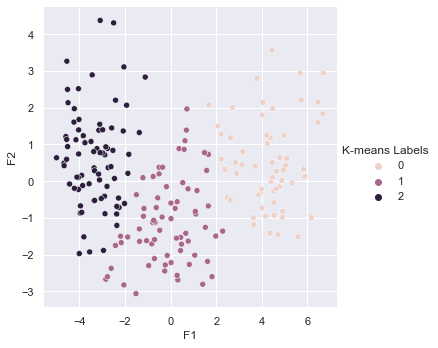

In [171]:
kmeans_labels = pd.DataFrame(cluster_labels_kemeans, columns=['K-means Labels'])
new_data2 = pd.concat([new_data1, kmeans_labels], axis = 1)
sns.relplot(x = "F1", y = "F2", hue = "K-means Labels", data = new_data2);

#### Plot DBScan

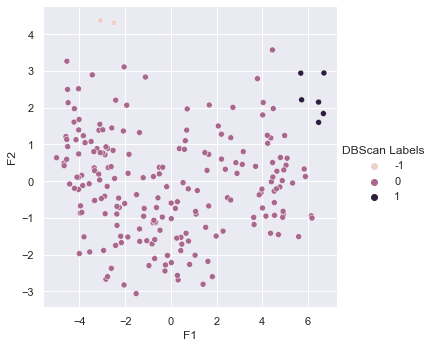

In [172]:
DBScan_labels = pd.DataFrame(clustering_DBScan, columns=['DBScan Labels'])
new_data3 = pd.concat([new_data1, DBScan_labels], axis = 1)
sns.relplot(x = "F1", y = "F2", hue = "DBScan Labels", data = new_data3);

#### Plot Mean Shift

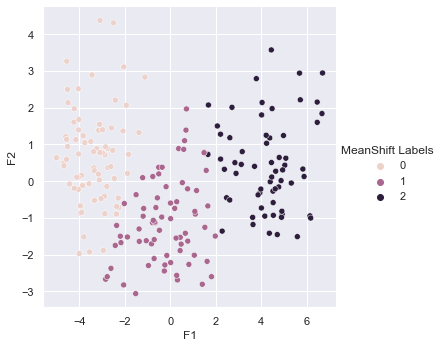

In [173]:
MeanShift_labels = pd.DataFrame(clustering_results_meanshift, columns=['MeanShift Labels'])
new_data4 = pd.concat([new_data1, MeanShift_labels], axis = 1)
sns.relplot(x = "F1", y = "F2", hue = "MeanShift Labels", data = new_data4);

In [178]:
from sklearn.metrics.cluster import adjusted_rand_score
print('Adjust Score Kmeans and DBScan', adjusted_rand_score(cluster_labels_kemeans, clustering_DBScan))
print('Adjust Score Kmeans and Mean Shift',adjusted_rand_score(cluster_labels_kemeans, clustering_results_meanshift))
print('Adjust Score DBScan and Mean Shift',adjusted_rand_score(clustering_DBScan, clustering_results_meanshift))

Adjust Score Kmeans and DBScan 0.008863677170214712
Adjust Score Kmeans and Mean Shift 0.9433380742915772
Adjust Score DBScan and Mean Shift 0.007420703536991058


### Bar graph of the performance - Part 8

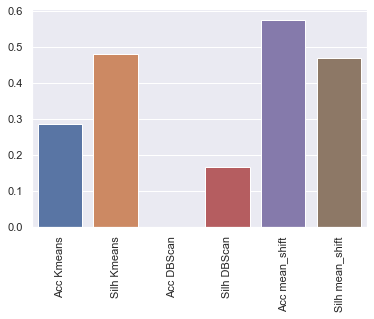

In [174]:


yy1 = accuracy_score(cluster_labels_kemeans, y)
yy2 = accuracy_score(clustering_DBScan, y)
yy3 = accuracy_score(clustering_results_meanshift, y)

xx = ['Acc Kmeans', 'Silh Kmeans', 'Acc DBScan', 'Silh DBScan', 'Acc mean_shift', 'Silh mean_shift']
yy = [yy1, max(score_kmeans), yy2, max(score_DBScan), yy3, max(score_mean_shift)]
ax = sns.barplot(x=xx, y=yy)
ax.tick_params(axis='x', rotation=90)